## TWITTER SENTIMENT ANALYSIS IN PYTHON WITH TextBlob AND tweepy

### Import Libraries

In [1]:
from textblob import TextBlob
import tweepy
import numpy as np
import matplotlib.pyplot as plt

### Authenticate Python Application with Twitter

In [2]:
consumer_key='XXXXXXXX'
secret_key='XXXXXXXX'
access_token='XXXXXXXX'
access_token_secret='XXXXXXXX'

auth=tweepy.OAuthHandler(consumer_key,secret_key)
auth.set_access_token(access_token,access_token_secret)

### Reading Tweets

In [3]:
api=tweepy.API(auth)
public_tweets=api.search('trump', count=100, lang='en')

### Analyzing Sentiment Polarity and Subjectivity

In [4]:
pol=[]           
sub=[]
pos_count=0
neg_count=0
neut_count=0

for tweet in public_tweets:
    analysis=TextBlob(tweet.text)

    if(analysis.sentiment.polarity>0):
        pos_count+=1
    elif(analysis.sentiment.polarity< 0):
        neg_count+=1
    else:
        neut_count+=1
        
    pol.append(analysis.sentiment.polarity)
    sub.append(analysis.sentiment.subjectivity)

### Data Representation

Average Polarity: 0.091
Average Subjectivity: 0.349


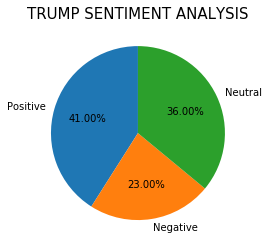

In [5]:
pol_avg = round(np.array(pol).mean(),3)
sub_avg= round(np.array(sub).mean(),3)

print(f"Average Polarity: {pol_avg}\nAverage Subjectivity: {sub_avg}")

data=[pos_count, neg_count, neut_count]
labels= ["Positive", "Negative", "Neutral"]
plt.pie(x=data, labels=labels, startangle=90, autopct='%1.2f%%')
plt.title("TRUMP SENTIMENT ANALYSIS",fontsize=15)
plt.show()